In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#modelo de classificação: cliente fica ou vai embora do banco?

df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df = df.drop('RowNumber', axis=1)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
df = df.set_index('CustomerId')
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [16]:
df_d = pd.get_dummies(df)
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [17]:
df_d.iloc[:, 0:20]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_Abazu,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,Surname_Abramova,Surname_Abramovich,Surname_Abramowitz
CustomerId,,,,,,,,,,,,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0,0,0,0,0,0
15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,0,0,0,0,0,0,0,0
15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0,0,0,0,0
15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,0,0,0,0,0,0
15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,39,5,0.00,2,1,0,96270.64,0,0,0,0,0,0,0,0,0,0,0,0
15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,0,0,0,0,0,0,0,0,0,0
15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,0,0,0,0,0,0,0,0,0


In [20]:
#X = variável priditiva e y=variável resposta
X = df_d.drop('Exited', axis=1)
y=df_d.Exited


In [23]:
#proporção de classes
y.mean()

0.2037

In [25]:
#ou classe 0 = quem fecha
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [27]:
y.value_counts() / y.shape[0]

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [47]:
#separação em treino e tesle
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.30, random_state=61658)

In [33]:
#treinando modelo
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=61658, n_jobs=-1)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=61658,
                       verbose=0, warm_start=False)

In [34]:
rf.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=61658,
                       verbose=0, warm_start=False)

In [35]:
rf.predict_proba(X_ts)

array([[0.77830931, 0.22169069],
       [0.78143357, 0.21856643],
       [0.7644429 , 0.2355571 ],
       ...,
       [0.75750048, 0.24249952],
       [0.83725705, 0.16274295],
       [0.8296555 , 0.1703445 ]])

In [37]:
pd.DataFrame(rf.predict_proba(X_ts), columns=['Propensão 0', 'Propensão 1'])

,Propensão 0,Propensão 1
0,0.778309,0.221691
1,0.781434,0.218566
2,0.764443,0.235557
3,0.829437,0.170563
4,0.823122,0.176878
...,...,...
2995,0.811811,0.188189
2996,0.784953,0.215047
2997,0.757500,0.242500
2998,0.837257,0.162743


In [42]:
pred = rf.predict_proba(X_ts)[:,1]
pred
#vendo quem pode sair do banco

array([0.22169069, 0.21856643, 0.2355571 , ..., 0.24249952, 0.16274295,
       0.1703445 ])

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_ts, pred)

0.8110854166666667

(array([13.,  8., 16., 36., 31., 37., 30., 50., 38., 28., 61., 28., 36.,
        23., 28., 17.,  8., 28., 22., 12., 11.,  4.,  9.,  7.,  1.,  5.,
         3.,  2.,  5.,  3.]),
 array([0.15091574, 0.15959963, 0.16828352, 0.17696741, 0.1856513 ,
        0.19433519, 0.20301908, 0.21170297, 0.22038686, 0.22907075,
        0.23775464, 0.24643852, 0.25512241, 0.2638063 , 0.27249019,
        0.28117408, 0.28985797, 0.29854186, 0.30722575, 0.31590964,
        0.32459353, 0.33327741, 0.3419613 , 0.35064519, 0.35932908,
        0.36801297, 0.37669686, 0.38538075, 0.39406464, 0.40274853,
        0.41143242]),
 <a list of 30 Patch objects>)

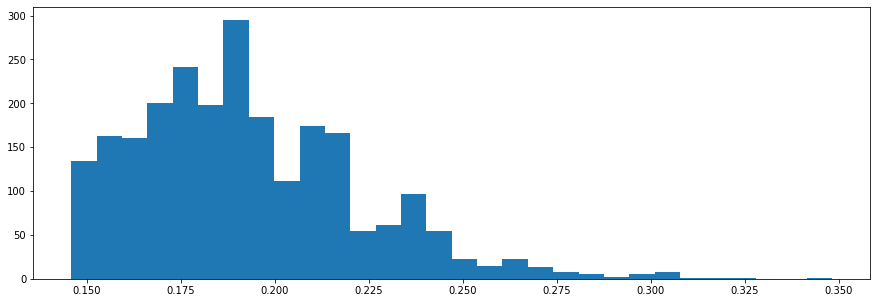

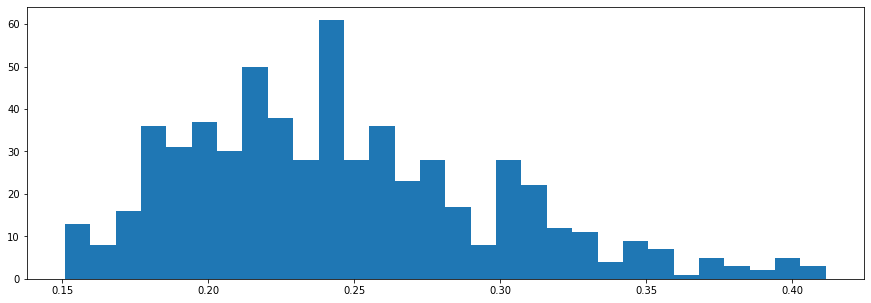

In [51]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins=30)

plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==1], bins=30)

In [52]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.65333333,
         1.96      ,  1.96      ,  5.88      ,  6.53333333,  6.37      ,
         6.69666667,  8.82      ,  6.37      , 10.61666667,  5.55333333,
         6.69666667,  3.92      ,  5.71666667,  1.96      ,  3.10333333,
         5.06333333,  2.28666667,  1.63333333,  1.47      ,  1.30666667,
         0.49      ,  0.81666667,  0.65333333,  0.16333333,  0.81666667,
         0.49      ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]),
 array([0.        , 0.01020408, 0.02040816, 0.03061224, 0.04081633,
        0.05102041, 0.06122449, 0.07142857, 0.08163265, 0.09183673,
        0.10204082, 0.1122449 , 0.12244898, 0.13265306, 0.14285714,
        0.15306122, 0.16326531, 0.17346939, 0.18367347, 0.19387755,
        0

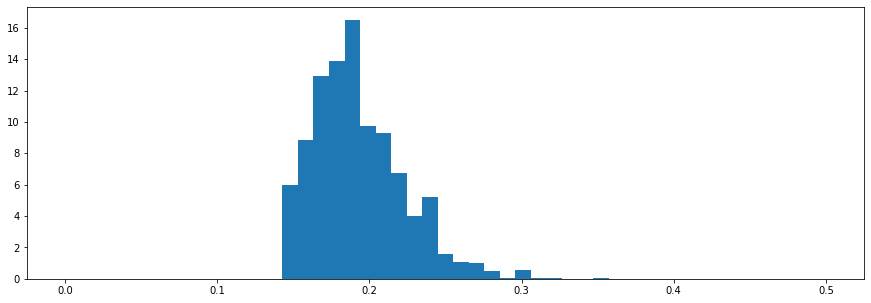

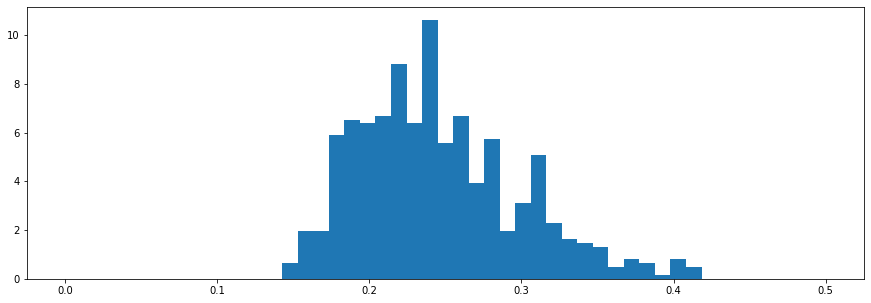

In [55]:
#comeparando histogramas
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins=np.linspace(0, .5, 50), density=1)

plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==1],bins=np.linspace(0, .5, 50), density=1)

In [62]:
np.arange(0, .501, 0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

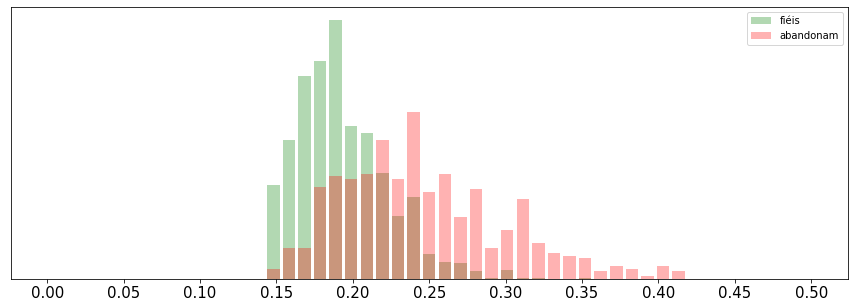

In [70]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins=np.linspace(0, .5, 50), density=1, color='g', alpha=.3, rwidth=.8, label='fiéis')
plt.hist(pred[y_ts==1], bins=np.linspace(0, .5, 50), density=1, color='r', alpha=.3, rwidth=.8,label='abandonam');

plt.xticks(np.arange(0, 0.501, 0.05), fontsize=15);
plt.yticks([])
plt.legend()